In [1]:
library(foreign); library(car)
library(lmtest)
library(AER)
library(plm)
library(stargazer)


Warning message:
"package 'car' was built under R version 4.2.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'AER' was built under R version 4.2.2"
Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.2"
Loading required package: survival

Warning message:
"package 'plm' was built under R version 4.2.3"

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




[1] 70  9

,country,year,y,y_bin,x1,x2,x3,opinion,op
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,A,2011,1.343e+09,1,0.2779036,-1.107956,0.2825536,Str agree,1


Warning message:
"package 'gplots' was built under R version 4.2.2"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




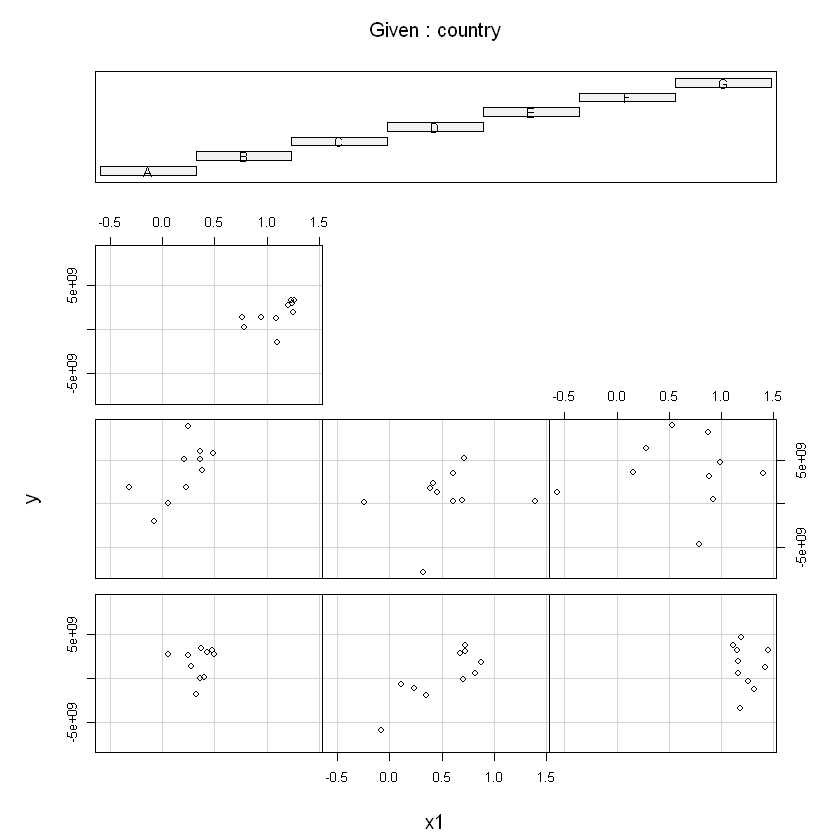

Warning message in plot.window(...):
""reg.line" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""reg.line" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"
Warning message in box(...):
""reg.line" is not a graphical parameter"
Warning message in title(...):
""reg.line" is not a graphical parameter"


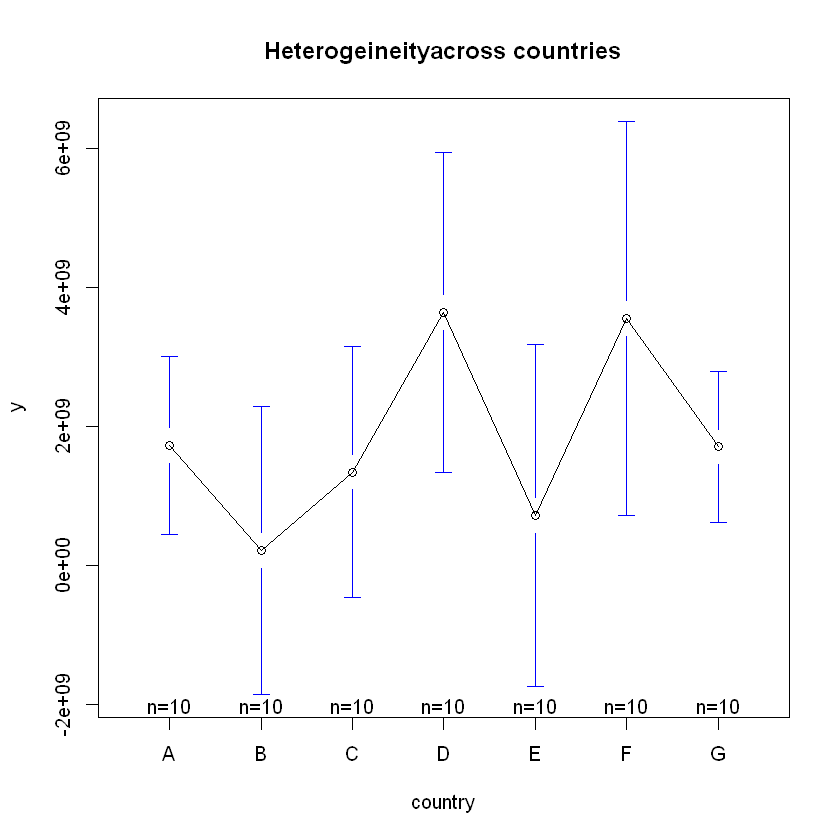

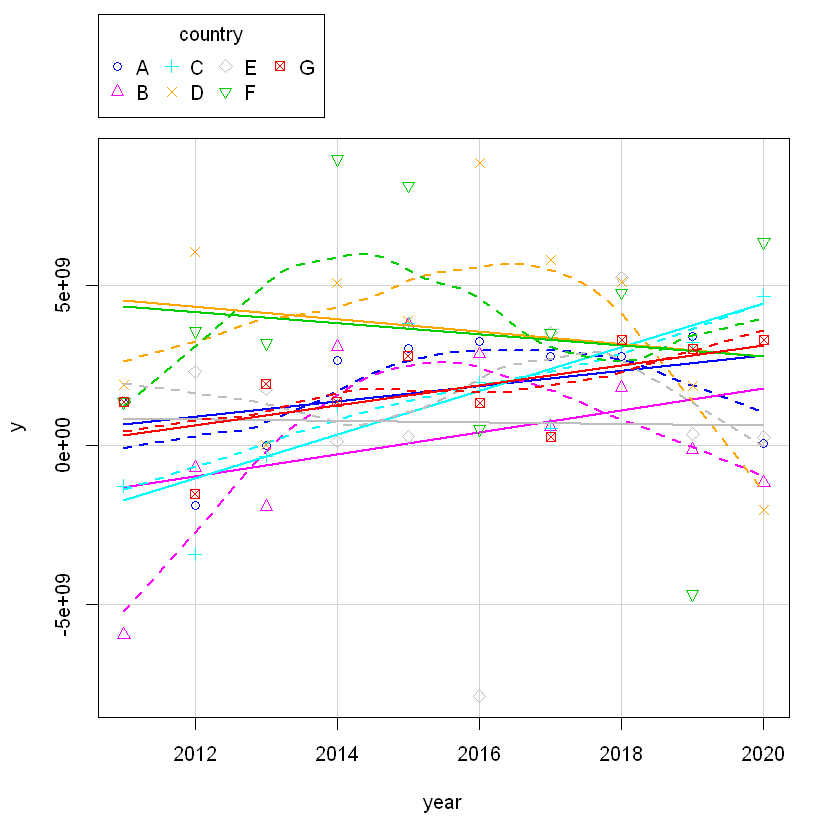

In [3]:
panel101=read.csv("Panel101_new.csv")
dim(panel101     )      
head(panel101,1)
coplot(y~x1|country, type="p", data=panel101)
# coplot
library(gplots)
plotmeans(y ~ country, main="Heterogeineityacross countries", data=panel101)
scatterplot(y~year|country, boxplots=FALSE, smooth=TRUE, reg.line=FALSE, data=panel101)

In [4]:
## PANEL MODELS



# INPUT DATA 
 

## ƯỚC LƯỢNG GỘP POLS
print('Phương pháp POLS=OLS')
pols_1=lm(y~x1,data=panel101)
summary(pols_1)
print('"polling" được chọn trong phương pháp plm chính là OLS')
pooling_1=plm(y~x1,data=panel101,index=c("country","year"),model="pooling") # 
summary(pooling_1)

[1] "Phương pháp POLS=OLS"



Call:
lm(formula = y ~ x1, data = panel101)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.546e+09 -1.578e+09  1.556e+08  1.422e+09  7.183e+09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.524e+09  6.211e+08   2.454   0.0167 *
x1          4.950e+08  7.789e+08   0.636   0.5272  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.028e+09 on 68 degrees of freedom
Multiple R-squared:  0.005905,	Adjusted R-squared:  -0.008714 
F-statistic: 0.4039 on 1 and 68 DF,  p-value: 0.5272


[1] "\"polling\" được chọn trong phương pháp plm chính là OLS"


Pooling Model

Call:
plm(formula = y ~ x1, data = panel101, model = "pooling", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-9.55e+09 -1.58e+09  1.56e+08  0.00e+00  1.42e+09  7.18e+09 

Coefficients:
              Estimate Std. Error t-value Pr(>|t|)  
(Intercept) 1524377323  621069111  2.4544  0.01668 *
x1           494985596  778856838  0.6355  0.52722  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    6.2729e+20
Residual Sum of Squares: 6.2358e+20
R-Squared:      0.0059046
Adj. R-Squared: -0.0087145
F-statistic: 0.403896 on 1 and 68 DF, p-value: 0.52722

In [ ]:
## ƯỚC LƯỢNG MÔ HÌNH TÁC ĐỘNG CỐ ĐỊNH-FEM

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1 + factor(year), data = panel101, model = "within", 
    index = c("country", "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-7.92e+09 -1.05e+09 -1.40e+08  0.00e+00  1.63e+09  5.49e+09 

Coefficients:
                   Estimate Std. Error t-value Pr(>|t|)  
x1               1389046243 1319846247  1.0524  0.29738  
factor(year)2012  296175971 1503364775  0.1970  0.84457  
factor(year)2013  145305426 1547222680  0.0939  0.92553  
factor(year)2014 2874279154 1503858813  1.9113  0.06138 .
factor(year)2015 2848001591 1661494784  1.7141  0.09235 .
factor(year)2016  974083813 1567241800  0.6215  0.53692  
factor(year)2017 1672627351 1631535116  1.0252  0.30993  
factor(year)2018 2991866255 1627057943  1.8388  0.07155 .
factor(year)2019  367319130 1587920514  0.2313  0.81796  
factor(year)2020 1258662247 1512393834  0.8322  0.40901  
---
Signif. codes:  

[1] "Các hệ số chặn"


A           B           C           D           E           F 
  -90249287 -1842379821 -1719279289  2029751877 -1363497691  1347478105 
          G 
-1146470157

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1 + factor(country), data = panel101, model = "within", 
    index = c("country", "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.63e+09 -9.70e+08  5.41e+08  0.00e+00  1.39e+09  5.61e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2475603630 1106674872   2.237  0.02889 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.8454e+20
R-Squared:      0.074683
Adj. R-Squared: -0.029788
F-statistic: 5.00406 on 1 and 62 DF, p-value: 0.028893

[1] "Các hệ số chặn"


A           B           C           D           E           F 
  880575786 -1057747200 -1722769160  3162913970  -602518120  2010659654 
          G 
 -984565425

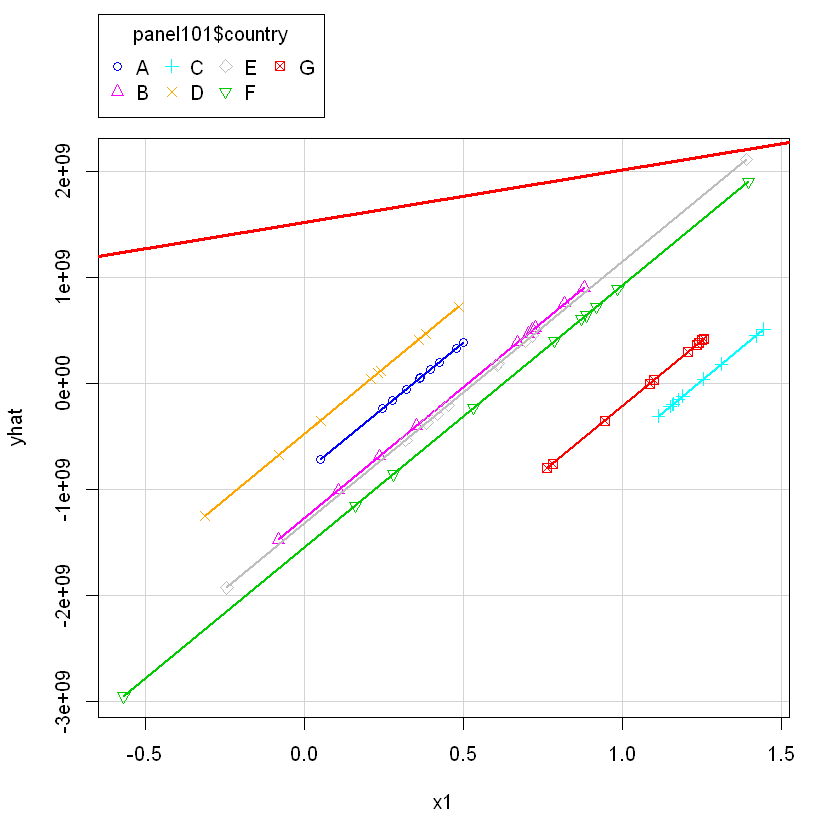

In [5]:
# Testing for time-fixed effects- biến giả theo thời gian, gọi chung là SLDV-Structural Lagrange and Dummy Variable
fixed_time=plm(y~x1+factor(year),data=panel101,index=c("country", "year"), model="within") # ,index=c("country","year"),model="within") # 
summary(fixed_time)
print('Các hệ số chặn')
fixef(fixed_time)


# Testing for individual-fixed effects 
fixed_indi=plm(y~x1+factor(country),data=panel101,index=c("country", "year"), model="within")
summary(fixed_indi)
scatterplot(fitted(fixed_indi)~panel101$x1|panel101$country, boxplots=FALSE, xlab="x1", ylab="yhat",smooth=FALSE)
abline(lm(panel101$y~panel101$x1),lwd=3, col="red")

print('Các hệ số chặn')
fixef(fixed_indi)

In [6]:

fixed_1=plm(y~x1,data=panel101,index=c("country", "year"), model="within")
summary(fixed_1)
print('Các hệ số chặn')
fixef(fixed_1)
#  Testing time-fixed effects. The null is that no time-fixed effects needed
# pFtest(fixed, ols) # Testing for fixed effects, null: OLS better than fixed
pFtest(fixed_time, fixed_1)
bptest(fixed_1)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1, data = panel101, model = "within", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.63e+09 -9.70e+08  5.41e+08  0.00e+00  1.39e+09  5.61e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2475603630 1106674872   2.237  0.02889 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.8454e+20
R-Squared:      0.074683
Adj. R-Squared: -0.029788
F-statistic: 5.00406 on 1 and 62 DF, p-value: 0.028893

[1] "Các hệ số chặn"


A           B           C           D           E           F 
  880575786 -1057747200 -1722769160  3162913970  -602518120  2010659654 
          G 
 -984565425


	F test for individual effects

data:  y ~ x1 + factor(year)
F = 1.209, df1 = 9, df2 = 53, p-value = 0.3094
alternative hypothesis: significant effects



	studentized Breusch-Pagan test

data:  fixed_1
BP = 1.933, df = 1, p-value = 0.1644


In [7]:
## ƯỚC LƯỢNG MO HÌNH TÁC ĐỘNG NGẪU NHIÊN REM  

random_1=plm(y~x1,data=panel101,index=c("country","year"),model="random") # random model
summary(random_1)
bptest(random_1)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1, data = panel101, model = "random", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.815e+18 2.796e+09 0.873
individual    1.133e+18 1.064e+09 0.127
theta: 0.3611

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.94e+09 -1.51e+09  2.82e+08  0.00e+00  1.56e+09  6.63e+09 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)
(Intercept) 1037106114  790610726  1.3118   0.1896
x1          1246946639  902135851  1.3822   0.1669

Total Sum of Squares:    5.6595e+20
Residual Sum of Squares: 5.5048e+20
R-Squared:      0.027328
Adj. R-Squared: 0.013024
Chisq: 1.91052 on 1 DF, p-value: 0.16691


	studentized Breusch-Pagan test

data:  random_1
BP = 1.933, df = 1, p-value = 0.1644


In [8]:

## FEM HAY REM?

# fixed_1=plm(y~x1,data=panel101,index=c("country", "year"), model="within") # 

phtest(fixed_1,random_1) # Hausman test



	Hausman Test

data:  y ~ x1
chisq = 3.6741, df = 1, p-value = 0.05527
alternative hypothesis: one model is inconsistent


: 